In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch import nn

In [2]:
data = pd.read_csv('/Users/William/Desktop/中科院/project/WHO_NREVSS_Clinical_Labs.csv',header=1)

In [3]:
data

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B
0,HHS Regions,Region 1,2015,40,693,2,3,0.721501,0.288600,0.432900
1,HHS Regions,Region 2,2015,40,1220,5,0,0.409836,0.409836,0.000000
2,HHS Regions,Region 3,2015,40,896,0,1,0.111607,0.000000,0.111607
3,HHS Regions,Region 4,2015,40,2486,24,16,1.609010,0.965406,0.643604
4,HHS Regions,Region 5,2015,40,2138,14,3,0.795136,0.654818,0.140318
...,...,...,...,...,...,...,...,...,...,...
1625,HHS Regions,Region 6,2018,46,2155,16,6,1.020880,0.742459,0.278422
1626,HHS Regions,Region 7,2018,46,735,3,0,0.408163,0.408163,0.000000
1627,HHS Regions,Region 8,2018,46,1135,12,1,1.145370,1.057270,0.088106
1628,HHS Regions,Region 9,2018,46,539,8,0,1.484230,1.484230,0.000000


In [4]:
data = data.drop(columns=['REGION TYPE','TOTAL SPECIMENS','TOTAL A','TOTAL B'])
data

,REGION,YEAR,WEEK,PERCENT POSITIVE,PERCENT A,PERCENT B
0,Region 1,2015,40,0.721501,0.288600,0.432900
1,Region 2,2015,40,0.409836,0.409836,0.000000
2,Region 3,2015,40,0.111607,0.000000,0.111607
3,Region 4,2015,40,1.609010,0.965406,0.643604
4,Region 5,2015,40,0.795136,0.654818,0.140318
...,...,...,...,...,...,...
1625,Region 6,2018,46,1.020880,0.742459,0.278422
1626,Region 7,2018,46,0.408163,0.408163,0.000000
1627,Region 8,2018,46,1.145370,1.057270,0.088106
1628,Region 9,2018,46,1.484230,1.484230,0.000000


In [5]:
reg1 = data.loc[data['REGION']=='Region 1',:]
reg1

,REGION,YEAR,WEEK,PERCENT POSITIVE,PERCENT A,PERCENT B
0,Region 1,2015,40,0.721501,0.288600,0.432900
10,Region 1,2015,41,1.994680,1.462770,0.531915
20,Region 1,2015,42,0.988701,0.564972,0.423729
30,Region 1,2015,43,0.279330,0.139665,0.139665
40,Region 1,2015,44,0.128041,0.000000,0.128041
...,...,...,...,...,...,...
1580,Region 1,2018,42,0.180180,0.180180,0.000000
1590,Region 1,2018,43,1.388890,1.041670,0.347222
1600,Region 1,2018,44,1.876470,1.485540,0.390930
1610,Region 1,2018,45,1.971610,1.971610,0.000000


In [6]:
y=data['PERCENT POSITIVE'].values

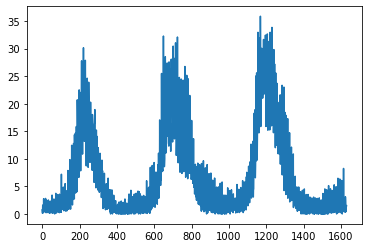

In [7]:
plt.plot(range(0,1630),y)

In [8]:
y=y.astype('float32')

In [9]:
y_max = np.max(y)
norm_data = []
for i in y:
    i = i/y_max
    norm_data.append(i)

In [10]:
np.array(norm_data)

array([0.02011484, 0.01142588, 0.00311151, ..., 0.03193194, 0.04137907,
       0.04173537], dtype=float32)

In [11]:
def dataset(data,lookback=5):
    trainx = []
    trainy = []
    for i in range(0,len(data)-lookback):
        trainx.append(data[i:(i+lookback)])
        trainy.append(data[i+lookback])
    return np.array(trainx) , np.array(trainy)

In [12]:
trainx, trainy = dataset(norm_data)

In [13]:
len(trainx)

1625

In [14]:
len(trainy)

1625

In [15]:
train_size = int(len(norm_data)*0.81)
train1 = trainx[:train_size]
testx = trainx[train_size:]
trainy = trainy[:train_size]

In [16]:
train1 = train1.reshape(-1,1,5)

In [17]:
trainy = trainy.reshape(-1,1,1)

In [18]:
train1=torch.from_numpy(train1)
trainy=torch.from_numpy(trainy)
from torch.autograd import Variable
train1 = Variable(train1)
trainy - Variable(trainy)

tensor([[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]])

In [19]:
class lstm_reg(nn.Module):
    def __init__(self, input_size = 5,output_size = 1,hidden_size = 10, num_layers = 4):
        super(lstm_reg, self).__init__()
        self.lstm = nn.LSTM(input_size,hidden_size,num_layers)
        self.linear = nn.Linear(hidden_size,output_size)
    def forward(self,x):
        pred,h=self.lstm(x)
        a,b,c=pred.shape
        h = pred.view(a*b,c)
        out = self.linear(h)
        out = out.view(a,b,-1)
        return out

In [20]:
from torch.optim.rmsprop import RMSprop
model = lstm_reg()
optimizer=torch.optim.Adam(model.parameters(), lr=1e-2)
criterion = torch.nn.MSELoss()

In [21]:
print(model)

lstm_reg(
  (lstm): LSTM(5, 10, num_layers=4)
  (linear): Linear(in_features=10, out_features=1, bias=True)
)


In [22]:
for i in range(300):
    out=model(train1)
    loss = criterion(out, trainy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1)%100 == 0 :
        print('Epoch: {}, Loss: {:.5f}'.format(i + 1, loss.data))

Epoch: 100, Loss: 0.01003
Epoch: 200, Loss: 0.00687
Epoch: 300, Loss: 0.00663
Epoch: 400, Loss: 0.00636
Epoch: 500, Loss: 0.00588
Epoch: 600, Loss: 0.00575
Epoch: 700, Loss: 0.00489
Epoch: 800, Loss: 0.00525
Epoch: 900, Loss: 0.00359
Epoch: 1000, Loss: 0.00246


In [23]:
model = model.eval()

In [24]:
test = trainx.reshape(-1,1,5)
test = torch.from_numpy(test)
test = Variable(test)

In [25]:
len(test)

1625

In [26]:
prediction = model(test)
prediction = prediction.view(-1).data.numpy()

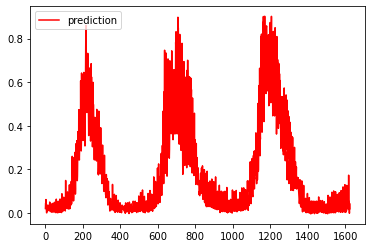

In [27]:
plt.plot(prediction, 'r', label='prediction')
plt.legend()

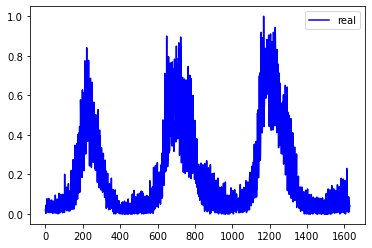

In [28]:
plt.plot(norm_data, 'b', label='real')
plt.legend()

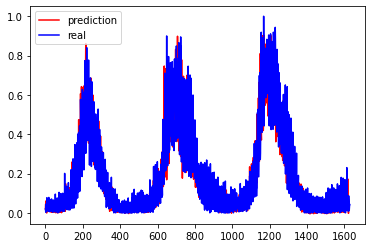

In [29]:
plt.plot(prediction, 'r', label='prediction')
plt.plot(norm_data, 'b', label='real')
plt.legend()

In [63]:
from sklearn.metrics import mean_absolute_error
diff = mean_absolute_error(norm_data[5:],prediction)

In [64]:
diff

0.032440107

In [65]:
#RNN
class RNN_reg(nn.Module):
    def __init__(self, input_size = 5,output_size = 1,hidden_size = 10, num_layers = 4):
        super(RNN_reg, self).__init__()
        self.RNN = nn.RNN(input_size,hidden_size,num_layers)
        self.linear = nn.Linear(hidden_size,output_size)
    def forward(self,x):
        pred,h=self.RNN(x)
        a,b,c=pred.shape
        h = pred.view(a*b,c)
        out = self.linear(h)
        out = out.view(a,b,-1)
        return out

In [66]:
from torch.optim.rmsprop import RMSprop
model = RNN_reg()
optimizer=torch.optim.Adam(model.parameters(), lr=1e-2)
criterion = torch.nn.MSELoss()

In [67]:
for i in range(300):
    out=model(train1)
    loss = criterion(out, trainy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1)%100 == 0 :
        print('Epoch: {}, Loss: {:.5f}'.format(i + 1, loss.data))

Epoch: 100, Loss: 0.00282
Epoch: 200, Loss: 0.00217
Epoch: 300, Loss: 0.00206


In [68]:
model = model.eval()
prediction = model(test)
prediction = prediction.view(-1).data.numpy()

In [69]:
from sklearn.metrics import mean_absolute_error
diff = mean_absolute_error(norm_data[5:],prediction)
diff

0.028342333

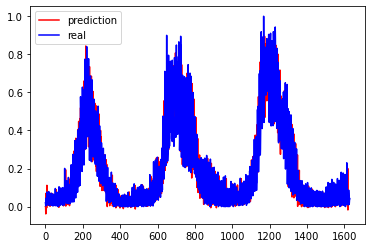

In [70]:
plt.plot(prediction, 'r', label='prediction')
plt.plot(norm_data, 'b', label='real')
plt.legend()

In [71]:
#RNN
class GRU_reg(nn.Module):
    def __init__(self, input_size = 5,output_size = 1,hidden_size = 10, num_layers = 4):
        super(GRU_reg, self).__init__()
        self.GRU = nn.GRU(input_size,hidden_size,num_layers)
        self.linear = nn.Linear(hidden_size,output_size)
    def forward(self,x):
        pred,h=self.GRU(x)
        a,b,c=pred.shape
        h = pred.view(a*b,c)
        out = self.linear(h)
        out = out.view(a,b,-1)
        return out

In [72]:
from torch.optim.rmsprop import RMSprop
model = GRU_reg()
optimizer=torch.optim.Adam(model.parameters(), lr=1e-2)
criterion = torch.nn.MSELoss()

In [73]:
for i in range(300):
    out=model(train1)
    loss = criterion(out, trainy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1)%100 == 0 :
        print('Epoch: {}, Loss: {:.5f}'.format(i + 1, loss.data))

Epoch: 100, Loss: 0.00885
Epoch: 200, Loss: 0.00640
Epoch: 300, Loss: 0.00576


In [75]:
model = model.eval()
prediction = model(test)
prediction = prediction.view(-1).data.numpy()
from sklearn.metrics import mean_absolute_error
diff = mean_absolute_error(norm_data[5:],prediction)
diff

0.048262272

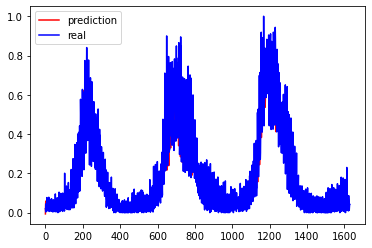

In [76]:
plt.plot(prediction, 'r', label='prediction')
plt.plot(norm_data, 'b', label='real')
plt.legend()

In [ ]:
#country

In [77]:
data = pd.read_csv('/Users/William/Desktop/中科院/project/WHO_NREVSS_Clinical_Labs.csv',header=1)

In [78]:
data = data.drop(columns=['REGION TYPE','TOTAL SPECIMENS','TOTAL A','TOTAL B'])
data

,REGION,YEAR,WEEK,PERCENT POSITIVE,PERCENT A,PERCENT B
0,Region 1,2015,40,0.721501,0.288600,0.432900
1,Region 2,2015,40,0.409836,0.409836,0.000000
2,Region 3,2015,40,0.111607,0.000000,0.111607
3,Region 4,2015,40,1.609010,0.965406,0.643604
4,Region 5,2015,40,0.795136,0.654818,0.140318
...,...,...,...,...,...,...
1625,Region 6,2018,46,1.020880,0.742459,0.278422
1626,Region 7,2018,46,0.408163,0.408163,0.000000
1627,Region 8,2018,46,1.145370,1.057270,0.088106
1628,Region 9,2018,46,1.484230,1.484230,0.000000


In [79]:
data = data.groupby(['YEAR','WEEK']).aggregate('sum')

In [80]:
data

PERCENT POSITIVE  PERCENT A  PERCENT B
YEAR WEEK                                        
2015 40            9.234498   6.517381   2.717118
     41           13.059848   9.386714   3.673127
     42            8.860467   5.644058   3.216408
     43            8.312475   5.158315   3.154169
     44            8.402650   4.809326   3.593320
...                     ...        ...        ...
2018 42           12.388489   9.347057   3.041430
     43           12.925572   9.930643   2.994929
     44           15.373947  12.090195   3.283745
     45           18.878983  16.054450   2.824532
     46           13.312076  11.279256   2.032809

[163 rows x 3 columns]

In [81]:
data = data['PERCENT POSITIVE'].values
data = data.astype('float32')

In [82]:
max_num = max(data)
norm_data = []
for i in data:
    i = i/max_num
    norm_data.append(i)

In [83]:
def dataset(data,lookback=5):
    trainx = []
    trainy = []
    for i in range(0,len(data)-lookback):
        trainx.append(data[i:(i+lookback)])
        trainy.append(data[i+lookback])
    return np.array(trainx) , np.array(trainy)
train1, train2 = dataset(norm_data)

In [84]:
from torch.autograd import Variable
train_size = int(len(norm_data)*0.8)
trainx = train1[:train_size]
testx = train1[train_size:]
trainy = train2[:train_size]

trainx = trainx.reshape(-1,1,5)
trainy = trainy.reshape(-1,1,1)
trainx = torch.from_numpy(trainx)
trainy = torch.from_numpy(trainy)
trainx = Variable(trainx)
trainy = Variable(trainy)

In [88]:
class lstm_country(nn.Module):
    def __init__(self, input_size = 5,output_size = 1,hidden_size = 10, num_layers = 4):
        super(lstm_country, self).__init__()
        self.lstm = nn.LSTM(input_size,hidden_size,num_layers)
        self.linear = nn.Linear(hidden_size,output_size)
    def forward(self,x):
        pred,h=self.lstm(x)
        a,b,c=pred.shape
        h = pred.view(a*b,c)
        out = self.linear(h)
        out = out.view(a,b,-1)
        return out

In [89]:
from torch.optim.rmsprop import RMSprop
model = lstm_country()
optimizer=torch.optim.Adam(model.parameters(), lr=1e-2)
criterion = torch.nn.MSELoss()

In [90]:
for i in range(100):
    out=model(trainx)
    loss = criterion(out, trainy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1)%100 == 0 :
        print('Epoch: {}, Loss: {:.5f}'.format(i + 1, loss.data))

Epoch: 100, Loss: 0.00398


In [91]:
model=model.eval()

In [92]:
test_data = train1.reshape(-1,1,5)
test = torch.from_numpy(test_data)
test = Variable(test)
pred = model(test)

In [93]:
pred = pred.view(-1).data.numpy()

In [95]:
from sklearn.metrics import mean_absolute_error
diff = mean_absolute_error(norm_data[5:],pred)
diff

0.04113003

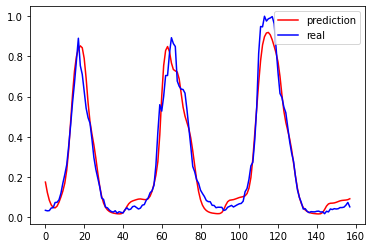

In [96]:
plt.plot(pred,'r',label='prediction')
plt.plot(norm_data[5:],'b',label='real')
plt.legend()

In [97]:
class RNN_country(nn.Module):
    def __init__(self, input_size = 5,output_size = 1,hidden_size = 10, num_layers = 4):
        super(RNN_country, self).__init__()
        self.RNN = nn.RNN(input_size,hidden_size,num_layers)
        self.linear = nn.Linear(hidden_size,output_size)
    def forward(self,x):
        pred,h=self.RNN(x)
        a,b,c=pred.shape
        h = pred.view(a*b,c)
        out = self.linear(h)
        out = out.view(a,b,-1)
        return out

In [98]:
from torch.optim.rmsprop import RMSprop
model = lstm_country()
optimizer=torch.optim.Adam(model.parameters(), lr=1e-2)
criterion = torch.nn.MSELoss()

In [99]:
for i in range(100):
    out=model(trainx)
    loss = criterion(out, trainy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1)%100 == 0 :
        print('Epoch: {}, Loss: {:.5f}'.format(i + 1, loss.data))

Epoch: 100, Loss: 0.00379


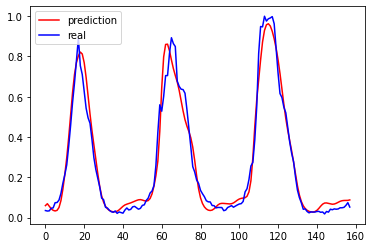

In [100]:
model=model.eval()
pred = model(test)
pred = pred.view(-1).data.numpy()
plt.plot(pred,'r',label='prediction')
plt.plot(norm_data[5:],'b',label='real')
plt.legend()

In [101]:
from sklearn.metrics import mean_absolute_error
diff = mean_absolute_error(norm_data[5:],pred)
diff

0.04076178

In [102]:
class GRU_country(nn.Module):
    def __init__(self, input_size = 5,output_size = 1,hidden_size = 10, num_layers = 4):
        super(GRU_country, self).__init__()
        self.GRU = nn.GRU(input_size,hidden_size,num_layers)
        self.linear = nn.Linear(hidden_size,output_size)
    def forward(self,x):
        pred,h=self.GRU(x)
        a,b,c=pred.shape
        h = pred.view(a*b,c)
        out = self.linear(h)
        out = out.view(a,b,-1)
        return out

In [103]:
from torch.optim.rmsprop import RMSprop
model = lstm_country()
optimizer=torch.optim.Adam(model.parameters(), lr=1e-2)
criterion = torch.nn.MSELoss()

In [104]:
for i in range(100):
    out=model(trainx)
    loss = criterion(out, trainy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1)%100 == 0 :
        print('Epoch: {}, Loss: {:.5f}'.format(i + 1, loss.data))

Epoch: 100, Loss: 0.00515


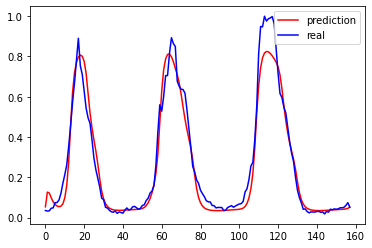

In [105]:
model=model.eval()
pred = model(test)
pred = pred.view(-1).data.numpy()
plt.plot(pred,'r',label='prediction')
plt.plot(norm_data[5:],'b',label='real')
plt.legend()

In [106]:
from sklearn.metrics import mean_absolute_error
diff = mean_absolute_error(norm_data[5:],pred)
diff

0.045761228

In [6]:
plt.plot??

(array([1., 0., 0., 0., 0., 1., 4., 2., 1., 1.]),
 array([0.0324 , 0.03537, 0.03834, 0.04131, 0.04428, 0.04725, 0.05022,
        0.05319, 0.05616, 0.05913, 0.0621 ]),
 <BarContainer object of 10 artists>)

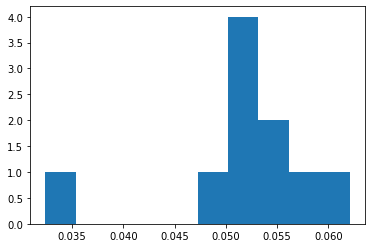

In [7]:
import matplotlib.pyplot as plt
import numpy as np
lstm = [0.0324,0.0491,0.0504,0.0536,0.0573,0.0621,0.0529,0.0523,0.0522,0.0535]
rnn = [0.0283,0.0303,0.0644,0.0325,0.0550,0.0521,0.0571,0.0340,0.0356,0.0521]
gru = [0.0482,0.0486,0.0495,0.0567,0.0577,0.0579,0.0591,0.0568,0.0583,0.0594]
x = range(len(lstm))
plt.hist(lstm)

In [33]:
ax.bar??

In [7]:
len(labels)

1

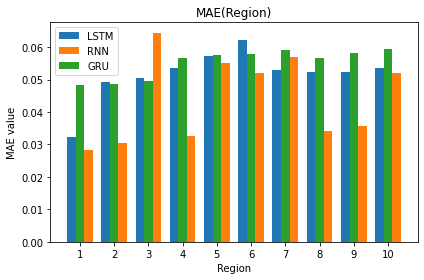

In [35]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['1','2','3','4','5','6','7','8','9','10']
lstm = [0.0324,0.0491,0.0504,0.0536,0.0573,0.0621,0.0529,0.0523,0.0522,0.0535

]
rnn = [0.0283,0.0303,0.0644,0.0325,0.0550,0.0521,0.0571,0.0340,0.0356,0.0521
]
gru = [0.0482,0.0486,0.0495,0.0567,0.0577,0.0579,0.0591,0.0568,0.0583,0.0594]

x = [2,4,6,8,10,12,14,16,18,20]
x=np.array(x)
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, lstm, width, label='LSTM')
rects2 = ax.bar(x + width, rnn, width, label='RNN')
rects3 = ax.bar(x , gru, width, label='GRU')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE value')
ax.set_title('MAE(Region)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Region')
ax.legend()



fig.tight_layout()
plt.savefig('books_read.png',dpi=300)
plt.show()

In [13]:
ax.set_xticklabels??

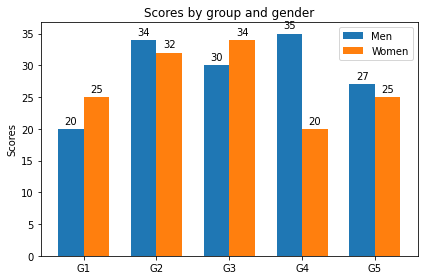

In [30]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()